In [2]:
# !pip install seaborn

     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [70]:
br_pd = pd.read_csv('./data/br.csv')
viscode_pd = pd.read_csv('./data/viscode.csv')
score_pd = pd.read_csv('./data/score.csv')
srl_s_pd = pd.read_csv('./data/srl_strategy.csv')
srl_m_pd = pd.read_csv('./data/srl_motivation.csv')
sill_pd = pd.read_csv('./data/sill.csv')

# Data Characteristics

## score

In [71]:
score_pd.nunique()

userid    467
score      74
class       9
dtype: int64

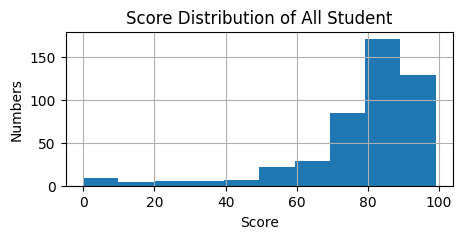

In [72]:
plt.figure(figsize=(5, 2))
score_pd['score'].hist(bins=10)
plt.title('Score Distribution of All Student')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.savefig('./data_plot/score')
plt.show()

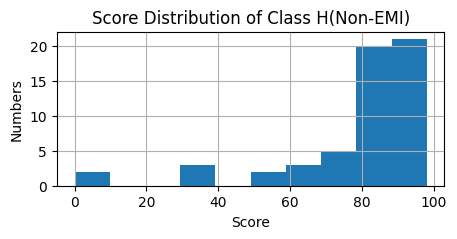

In [5]:
plt.figure(figsize=(5, 2))
score_pd[score_pd['class']=='h']['score'].hist(bins=10)

plt.title('Score Distribution of Class H(Non-EMI)')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.show()

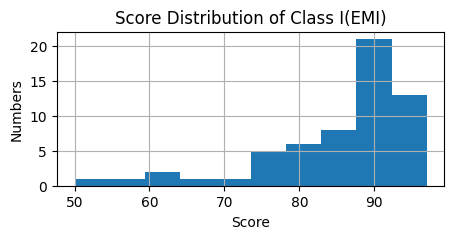

In [6]:
plt.figure(figsize=(5, 2))
score_pd[score_pd['class']=='i']['score'].hist(bins=10)

plt.title('Score Distribution of Class I(EMI)')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.show()

a


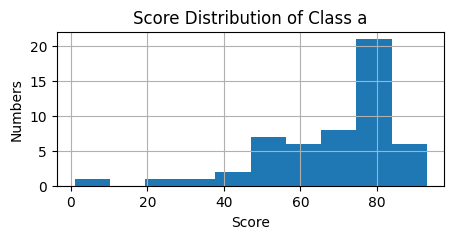

b


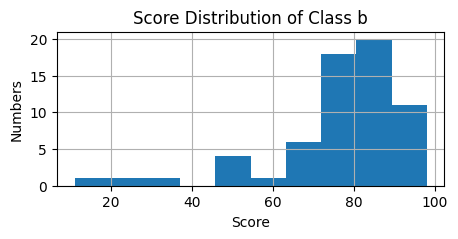

c


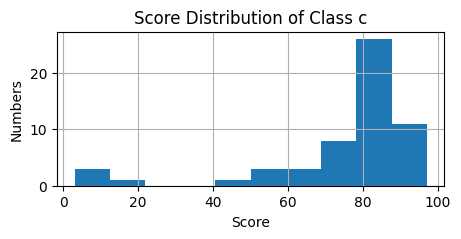

d


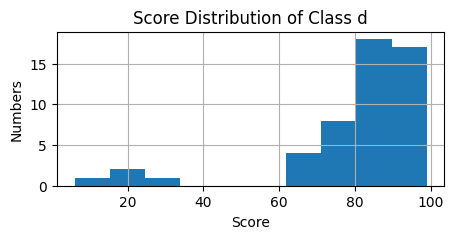

e


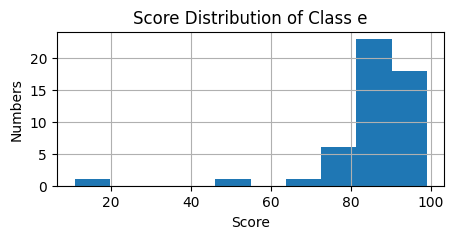

f


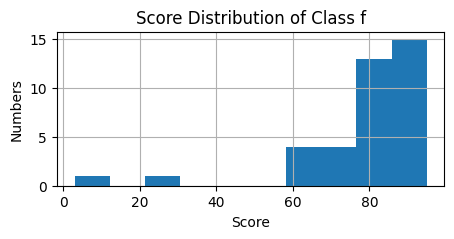

g


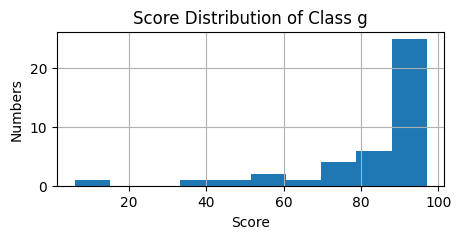

h


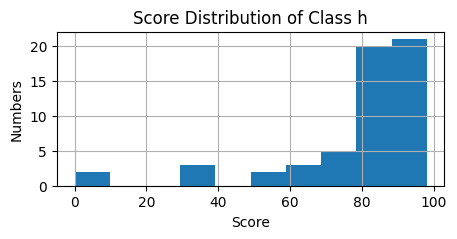

i


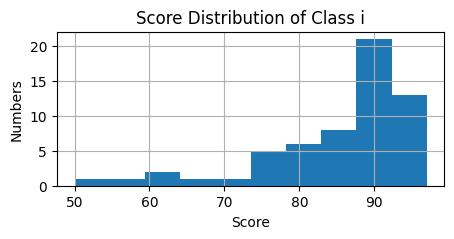

In [6]:
def Plot_Score():
    classID = 'abcdefghi'
    for cid in classID :
        print(cid)
        plt.figure(figsize=(5, 2))
        score_pd[score_pd['class']==cid]['score'].hist(bins=10)

        plt.title('Score Distribution of Class ' + cid )
        plt.ylabel('Numbers')
        plt.xlabel('Score')
        save_path = './data_plot/score_'+cid
        plt.savefig(save_path)
        plt.show()
Plot_Score()

# Data Statistics

# SILL

In [7]:
sill_pd = pd.read_csv('./data/sill.csv')

In [8]:
# Calculate Standard Deviation & Delete the data which sd=0 
question_list = sill_pd.columns[1:49]
sill_pd['sd'] = sill_pd[question_list].std(axis=1)
keep_list = sill_pd['sd'] > 0
sill_pd = sill_pd[keep_list]

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    memory        : 1-8 (8)
    cognitive     : 9-21 (13)
    compensation  : 22-27 (6)
    metacognitive : 28-36 (9)
    affective     : 37-42 (6)
    social        : 43-48 (6)
'''

memory_list = sill_pd.columns[1:9]
cognitive_list = sill_pd.columns[9:22]
compensation_list = sill_pd.columns[22:28]
metacognitive_list = sill_pd.columns[28:37]
affective_list = sill_pd.columns[37:43]
social_list = sill_pd.columns[43:49]

sill_pd['memory'] = sill_pd[memory_list].sum(axis=1)/8
sill_pd['cognitive'] = sill_pd[cognitive_list].sum(axis=1)/13
sill_pd['compensation'] = sill_pd[compensation_list].sum(axis=1)/6
sill_pd['metacognitive'] = sill_pd[metacognitive_list].sum(axis=1)/9
sill_pd['affective'] = sill_pd[affective_list].sum(axis=1)/6
sill_pd['social'] = sill_pd[social_list].sum(axis=1)/6

# keep data with same category
keep_list = ['userid', 'memory', 'cognitive', 'compensation', 'metacognitive', 'affective', 'social']
sill_pd = sill_pd[keep_list]
sill_pd = sill_pd.reset_index()
sill_pd = sill_pd.drop('index', axis=1)
sill_pd

,userid,memory,cognitive,compensation,metacognitive,affective,social
0,b1dfc5c6ec04d46d1823c5fa972ad320,3.500,4.307692,3.333333,5.000000,3.500000,3.000000
1,4e3519d7eafbfccdae231756fcf2ce9c,3.000,3.000000,2.833333,3.000000,3.833333,3.500000
2,0cebfa477ed3e2e0c5a3f9aa96c23698,4.875,4.846154,4.500000,4.888889,4.500000,4.333333
3,379bbc4c2c728db0a249e8c4e6b621af,3.250,5.000000,4.666667,4.666667,3.833333,5.000000
4,a92f1708363527a34d93b0bc7840262c,3.125,3.538462,3.833333,3.888889,3.500000,2.833333
...,...,...,...,...,...,...,...
245,c5721f60eac3a50a10fc9a59881aac29,1.750,2.615385,3.000000,2.333333,1.000000,2.500000
246,c9febcf368ffb0af2ec61cde63302683,2.000,2.000000,2.000000,3.333333,4.000000,3.166667
247,34a57f4705fa2af6bfc354453ff4f432,2.250,2.461538,2.666667,2.666667,2.333333,3.000000
248,ffc7749aa8337fadddcbd42d9cf6e5ec,3.500,3.538462,3.666667,3.888889,2.833333,3.666667


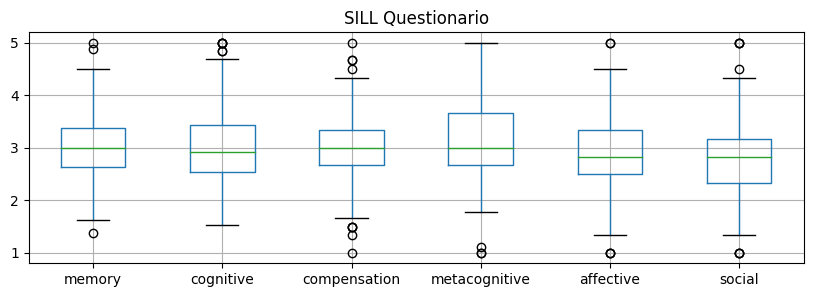

In [9]:
plt.figure(figsize=(10, 3))
sill_pd.boxplot()
plt.title('SILL Questionario')
plt.savefig('./data_plot/sill')
plt.show()

In [32]:
merged_pd = pd.merge(sill_pd, score_pd, on='userid', how='outer')

In [33]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,memory,cognitive,compensation,metacognitive,affective,social,score
memory,1.000000,0.687447,0.521149,0.622377,0.583888,0.482045,-0.048312
cognitive,0.687447,1.000000,0.720935,0.734674,0.515931,0.660646,0.032459
compensation,0.521149,0.720935,1.000000,0.607612,0.428731,0.628517,-0.001401
metacognitive,0.622377,0.734674,0.607612,1.000000,0.706362,0.597981,-0.060595
affective,0.583888,0.515931,0.428731,0.706362,1.000000,0.456871,-0.134026
social,0.482045,0.660646,0.628517,0.597981,0.456871,1.000000,-0.084982
score,-0.048312,0.032459,-0.001401,-0.060595,-0.134026,-0.084982,1.000000


In [34]:
corr = merged_pd.corr()
corr

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,memory,cognitive,compensation,metacognitive,affective,social,score
memory,1.000000,0.687447,0.521149,0.622377,0.583888,0.482045,-0.048312
cognitive,0.687447,1.000000,0.720935,0.734674,0.515931,0.660646,0.032459
compensation,0.521149,0.720935,1.000000,0.607612,0.428731,0.628517,-0.001401
metacognitive,0.622377,0.734674,0.607612,1.000000,0.706362,0.597981,-0.060595
affective,0.583888,0.515931,0.428731,0.706362,1.000000,0.456871,-0.134026
social,0.482045,0.660646,0.628517,0.597981,0.456871,1.000000,-0.084982
score,-0.048312,0.032459,-0.001401,-0.060595,-0.134026,-0.084982,1.000000


<Axes: >

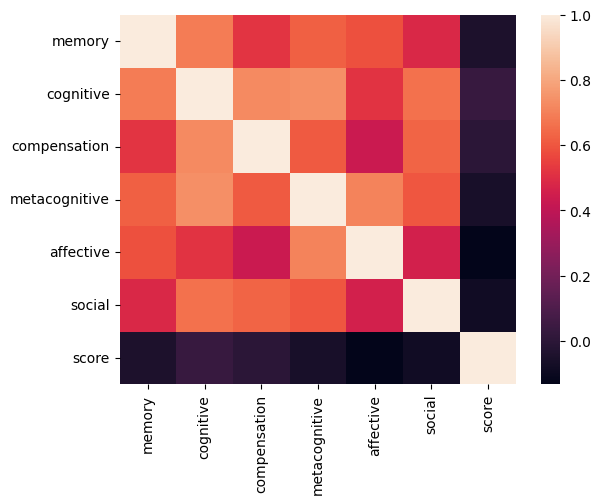

In [35]:
sns.heatmap(corr)

# SRL Motivation

In [10]:
srl_motivate_pd = pd.read_csv('./structured-data/srl_motivation.csv')

In [11]:
# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_motivate_pd.columns[1:32]
srl_motivate_pd['sd'] = srl_motivate_pd[question_list].std(axis=1)
keep_list = srl_motivate_pd['sd'] > 0
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    intrinsic       : 1-4 (4)
    extrinsic       : 5-8 (4)
    task_value      : 9-14 (6)
    control_beliefs : 15-18 (4)
    self_efficacy   : 19-26 (8)
    test_anxiety    : 27-31 (5)
'''

# classify data with same category
i = 1
intrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
extrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
task_value = srl_motivate_pd.columns[i:i+6]
i = i + 6
control_beliefs = srl_motivate_pd.columns[i:i+4]
i = i + 4
self_efficacy_and_performance = srl_motivate_pd.columns[i:i+8]
i = i + 8
test_anxiety = srl_motivate_pd.columns[i:i+5]


srl_motivate_pd['intrinsic'] = srl_motivate_pd[intrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['extrinsic'] = srl_motivate_pd[extrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['task_value'] = srl_motivate_pd[task_value].sum(axis=1)/6
srl_motivate_pd['control_beliefs'] = srl_motivate_pd[control_beliefs].sum(axis=1)/4
srl_motivate_pd['self_efficacy'] = srl_motivate_pd[self_efficacy_and_performance].sum(axis=1)/8
srl_motivate_pd['test_anxiety'] = srl_motivate_pd[test_anxiety].sum(axis=1)/5

# keep data with same category
keep_list = ['userid', 'intrinsic', 'extrinsic', 'task_value', 'control_beliefs', 'self_efficacy', 'test_anxiety']
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd = srl_motivate_pd.reset_index()
srl_motivate_pd = srl_motivate_pd.drop('index', axis=1)
srl_motivate_pd

,userid,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety
0,b84f9624c8d995c6b945afc898bd9973,3.75,1.50,4.166667,3.50,3.375,1.6
1,481c56986ebae62c870b0da9bbafc5c6,4.50,4.50,4.500000,4.50,4.500,4.6
2,0cebfa477ed3e2e0c5a3f9aa96c23698,5.00,4.50,5.000000,5.00,4.750,3.2
3,c054e8c731029ce6d73c784213513b09,4.25,5.00,4.000000,4.50,4.125,4.4
4,bebc49073c8a5def929612def946c281,3.25,3.50,3.833333,4.00,4.000,1.0
...,...,...,...,...,...,...,...
289,191ea163dc12fe1cb4c8397bd48f18aa,4.00,4.25,3.333333,3.25,2.375,4.0
290,da03bef31ab2dca5b97f8d240ccb4a61,4.25,4.00,4.000000,4.75,4.000,2.4
291,4f25425fdbeff3e6ce39ffa4d4a3cb0b,2.75,2.75,3.000000,2.75,2.500,2.2
292,843ac46f8cd7da73c4ae48b2deb4a729,4.00,3.75,4.000000,3.25,4.000,2.4


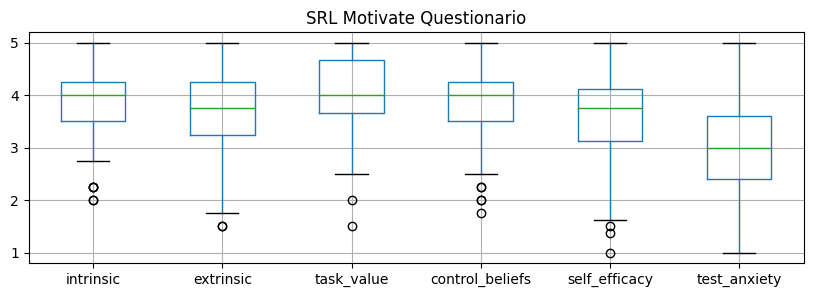

In [12]:
plt.figure(figsize=(10, 3))
srl_motivate_pd.boxplot()
plt.title('SRL Motivate Questionario')
plt.savefig('./data_plot/srl_motivation')
plt.show()

In [39]:
merged_pd = pd.merge(srl_motivate_pd, score_pd, on='userid', how='outer')

In [40]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,score
intrinsic,1.000000,0.217279,0.640090,0.553630,0.589352,-0.173064,0.189034
extrinsic,0.217279,1.000000,0.347524,0.312446,0.430823,0.192832,0.148260
task_value,0.640090,0.347524,1.000000,0.593413,0.580213,-0.092389,0.236749
control_beliefs,0.553630,0.312446,0.593413,1.000000,0.614551,-0.163029,0.190273
self_efficacy,0.589352,0.430823,0.580213,0.614551,1.000000,-0.296285,0.330979
test_anxiety,-0.173064,0.192832,-0.092389,-0.163029,-0.296285,1.000000,-0.154754
score,0.189034,0.148260,0.236749,0.190273,0.330979,-0.154754,1.000000


In [41]:
corr = merged_pd.corr()
corr

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,score
intrinsic,1.000000,0.217279,0.640090,0.553630,0.589352,-0.173064,0.189034
extrinsic,0.217279,1.000000,0.347524,0.312446,0.430823,0.192832,0.148260
task_value,0.640090,0.347524,1.000000,0.593413,0.580213,-0.092389,0.236749
control_beliefs,0.553630,0.312446,0.593413,1.000000,0.614551,-0.163029,0.190273
self_efficacy,0.589352,0.430823,0.580213,0.614551,1.000000,-0.296285,0.330979
test_anxiety,-0.173064,0.192832,-0.092389,-0.163029,-0.296285,1.000000,-0.154754
score,0.189034,0.148260,0.236749,0.190273,0.330979,-0.154754,1.000000


<Axes: >

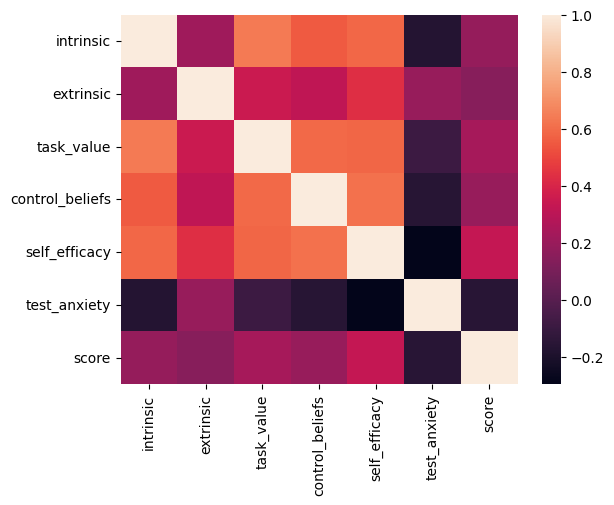

In [42]:
sns.heatmap(corr)

# SRL Strategy

In [13]:
srl_strategy_pd = pd.read_csv('./structured-data/srl_strategy.csv')

In [14]:
# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_strategy_pd.columns[1:51]
srl_strategy_pd['sd'] = srl_strategy_pd[question_list].std(axis=1)
keep_list = srl_strategy_pd['sd'] > 0
srl_strategy_pd = srl_strategy_pd[keep_list]


'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    rehearsal         : 1-4    (4)
    elaboration       : 5-10   (6)
    organization      : 11-14  (4)
    critical_thinking : 15-19  (5)
    metacognitive_self_regulation   : 20-31 (12)
    time_environment  : 32-39  (8)
    effort_regulation : 40-43  (4)
    peer_learning     : 44-46  (3)
    help_seeking      : 47-50  (4)
'''

# classify data with same category
i = 1
rehearsal = srl_strategy_pd.columns[i:i+4]
i = i + 4
elaboration = srl_strategy_pd.columns[i:i+6]
i = i + 6
organization = srl_strategy_pd.columns[i:i+4]
i = i + 4
critical_thinking = srl_strategy_pd.columns[i:i+5]
i = i + 5
metacognitive_self_regulation = srl_strategy_pd.columns[i:i+12]
i = i + 12
time_environment = srl_strategy_pd.columns[i:i+8]
i = i + 8
effort_regulation = srl_strategy_pd.columns[i:i+4]
i = i + 4
peer_learning = srl_strategy_pd.columns[i:i+3]
i = i + 3
help_seeking = srl_strategy_pd.columns[i:i+4]


# avg
srl_strategy_pd['rehearsal'] = srl_strategy_pd[rehearsal].sum(axis=1) / 4
srl_strategy_pd['elaboration'] = srl_strategy_pd[elaboration].sum(axis=1) / 6
srl_strategy_pd['organization'] = srl_strategy_pd[organization].sum(axis=1) / 4
srl_strategy_pd['critical_thinking'] = srl_strategy_pd[critical_thinking].sum(axis=1)/ 5
srl_strategy_pd['metacognitive_self_regulation'] = srl_strategy_pd[metacognitive_self_regulation].sum(axis=1)/12
srl_strategy_pd['time_environment'] = srl_strategy_pd[time_environment].sum(axis=1)/8
srl_strategy_pd['effort_regulation'] = srl_strategy_pd[effort_regulation].sum(axis=1)/4
srl_strategy_pd['peer_learning'] = srl_strategy_pd[peer_learning].sum(axis=1)/3
srl_strategy_pd['help_seeking'] = srl_strategy_pd[help_seeking].sum(axis=1)/4

# keep data with same category
keep_list = ['userid', 'rehearsal', 'elaboration', 'organization', 'critical_thinking', 
             'metacognitive_self_regulation', 'time_environment', 'effort_regulation', 'peer_learning', 'help_seeking']
srl_strategy_pd = srl_strategy_pd[keep_list]
srl_strategy_pd = srl_strategy_pd.reset_index()
srl_strategy_pd = srl_strategy_pd.drop('index', axis=1)
srl_strategy_pd

,userid,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking
0,b64ce7758b9f7e58f1ad8bbcf7811e7d,4.75,4.666667,5.00,3.2,4.000000,3.375,3.00,4.000000,4.75
1,0cebfa477ed3e2e0c5a3f9aa96c23698,4.00,4.500000,4.50,4.0,4.000000,4.125,4.25,3.666667,4.00
2,0a715a568a054d7996fcbcbf17b36551,3.75,3.833333,3.75,3.8,4.000000,3.375,3.00,3.333333,3.25
3,ca7f48cb0d61ed7c967adf1a0010367e,4.75,3.166667,3.75,3.4,3.500000,3.250,3.75,2.333333,3.25
4,2979bd5d5a584c2aa70f4a434412bc2b,4.00,4.166667,4.00,3.8,3.083333,4.000,3.25,2.666667,3.50
...,...,...,...,...,...,...,...,...,...,...
284,5d516333cdc7ae4c351ffc05ed50c416,4.00,4.000000,3.75,4.0,3.916667,3.250,3.00,4.000000,3.50
285,fa5b3a5211c7df0685492e45302a8815,3.25,3.666667,3.50,3.6,3.500000,3.375,3.25,3.333333,2.25
286,bcfbd3f8f69a013ed4fb0784088de7ff,4.25,4.166667,4.50,3.8,4.000000,3.875,4.00,3.333333,3.50
287,ffc7749aa8337fadddcbd42d9cf6e5ec,5.00,5.000000,5.00,4.8,4.666667,3.625,4.75,4.666667,4.00


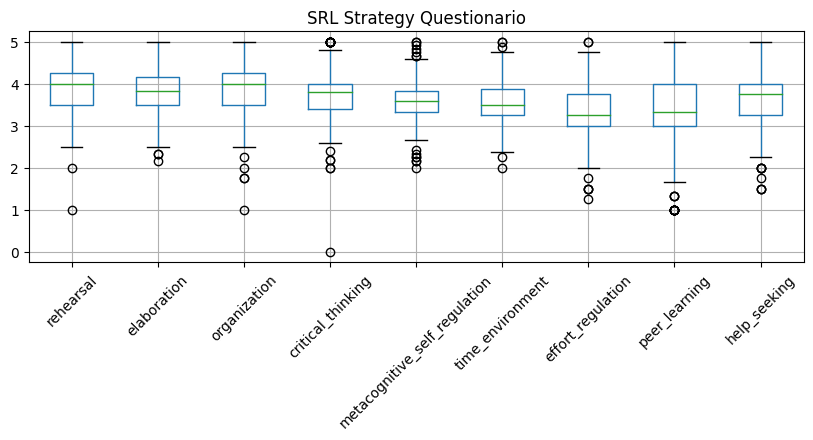

In [142]:
plt.figure(figsize=(10, 3))
srl_strategy_pd.boxplot()
plt.xticks(rotation=45)
plt.title('SRL Strategy Questionario')
results_path= './data_plot/srl_strategy'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

In [46]:
merged_pd = pd.merge(srl_strategy_pd, score_pd, on='userid', how='outer')

In [47]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking,score
rehearsal,1.000000,0.618342,0.597958,0.383609,0.541917,0.400509,0.196348,0.204007,0.319251,0.129100
elaboration,0.618342,1.000000,0.553778,0.574379,0.600783,0.414007,0.212828,0.229886,0.337394,0.184654
organization,0.597958,0.553778,1.000000,0.363034,0.488284,0.402882,0.257746,0.300550,0.360005,0.094724
critical_thinking,0.383609,0.574379,0.363034,1.000000,0.518734,0.292784,0.103370,0.227460,0.263514,0.093278
metacognitive_self_regulation,0.541917,0.600783,0.488284,0.518734,1.000000,0.616480,0.442053,0.365813,0.393645,0.124511
time_environment,0.400509,0.414007,0.402882,0.292784,0.616480,1.000000,0.614634,0.312479,0.212412,0.091364
effort_regulation,0.196348,0.212828,0.257746,0.103370,0.442053,0.614634,1.000000,0.288379,0.093942,0.033204
peer_learning,0.204007,0.229886,0.300550,0.227460,0.365813,0.312479,0.288379,1.000000,0.367935,0.114770
help_seeking,0.319251,0.337394,0.360005,0.263514,0.393645,0.212412,0.093942,0.367935,1.000000,0.126559
score,0.129100,0.184654,0.094724,0.093278,0.124511,0.091364,0.033204,0.114770,0.126559,1.000000


In [48]:
corr = merged_pd.corr()
corr

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking,score
rehearsal,1.000000,0.618342,0.597958,0.383609,0.541917,0.400509,0.196348,0.204007,0.319251,0.129100
elaboration,0.618342,1.000000,0.553778,0.574379,0.600783,0.414007,0.212828,0.229886,0.337394,0.184654
organization,0.597958,0.553778,1.000000,0.363034,0.488284,0.402882,0.257746,0.300550,0.360005,0.094724
critical_thinking,0.383609,0.574379,0.363034,1.000000,0.518734,0.292784,0.103370,0.227460,0.263514,0.093278
metacognitive_self_regulation,0.541917,0.600783,0.488284,0.518734,1.000000,0.616480,0.442053,0.365813,0.393645,0.124511
time_environment,0.400509,0.414007,0.402882,0.292784,0.616480,1.000000,0.614634,0.312479,0.212412,0.091364
effort_regulation,0.196348,0.212828,0.257746,0.103370,0.442053,0.614634,1.000000,0.288379,0.093942,0.033204
peer_learning,0.204007,0.229886,0.300550,0.227460,0.365813,0.312479,0.288379,1.000000,0.367935,0.114770
help_seeking,0.319251,0.337394,0.360005,0.263514,0.393645,0.212412,0.093942,0.367935,1.000000,0.126559
score,0.129100,0.184654,0.094724,0.093278,0.124511,0.091364,0.033204,0.114770,0.126559,1.000000


<Axes: >

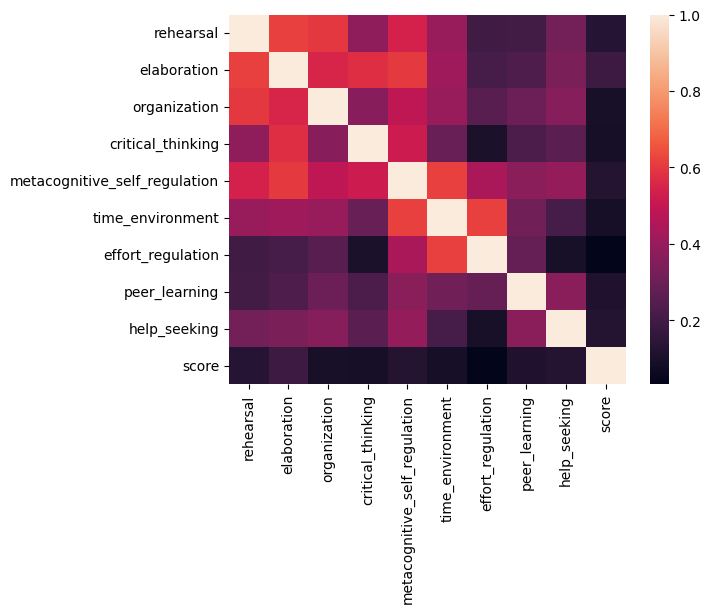

In [49]:
sns.heatmap(corr)

# Questionario & Score (correlation)

In [16]:
merged_pd = pd.merge( srl_motivate_pd, srl_strategy_pd, on='userid', how='outer')
merged_pd = pd.merge( merged_pd, sill_pd, on='userid', how='outer')
merged_pd = pd.merge( merged_pd, score_pd, on='userid', how='outer')
merged_pd

,userid,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,rehearsal,elaboration,organization,...,peer_learning,help_seeking,memory,cognitive,compensation,metacognitive,affective,social,score,class
0,b84f9624c8d995c6b945afc898bd9973,3.75,1.5,4.166667,3.5,3.375,1.6,4.00,4.000000,3.0,...,5.000000,4.5,3.500,3.923077,3.833333,3.555556,3.833333,3.500000,81.0,b
1,481c56986ebae62c870b0da9bbafc5c6,4.50,4.5,4.500000,4.5,4.500,4.6,3.00,3.500000,3.5,...,4.000000,4.0,3.625,3.615385,4.166667,3.555556,3.166667,3.000000,84.0,b
2,0cebfa477ed3e2e0c5a3f9aa96c23698,5.00,4.5,5.000000,5.0,4.750,3.2,4.00,4.500000,4.5,...,3.666667,4.0,4.875,4.846154,4.500000,4.888889,4.500000,4.333333,98.0,b
3,c054e8c731029ce6d73c784213513b09,4.25,5.0,4.000000,4.5,4.125,4.4,5.00,4.333333,5.0,...,1.000000,5.0,2.125,1.923077,1.833333,2.666667,3.000000,1.333333,90.0,b
4,bebc49073c8a5def929612def946c281,3.25,3.5,3.833333,4.0,4.000,1.0,4.25,3.833333,4.0,...,3.000000,3.5,3.375,3.615385,4.333333,3.777778,3.500000,3.666667,85.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,48efb9df6a690a465b3f278c5a9d895a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,i
475,2f0bdb0015ddeb04983c73c1eac8113e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,i
476,5c7fc46ea1bae8f3d458fcc79e7e46ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,i
477,2ae49c0d134fd71043f019270ca2d194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,i


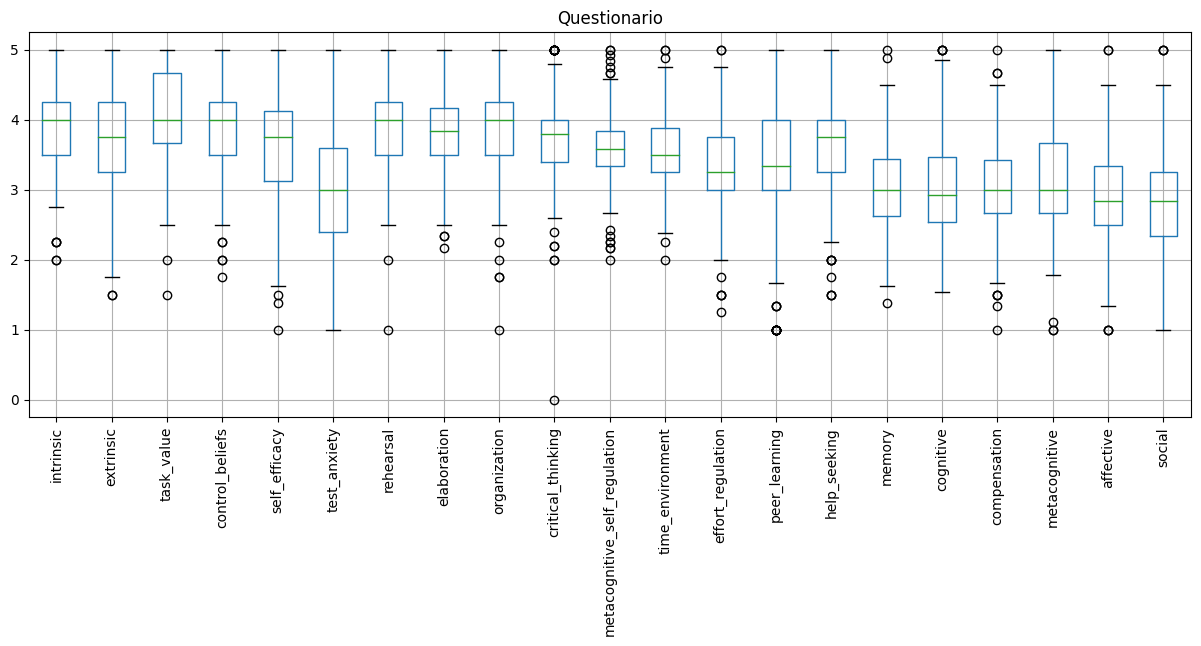

In [34]:
plt.figure(figsize=(15, 5))
merged_pd.drop('score', axis=1).boxplot()
plt.title('Questionario')
plt.xticks(rotation='vertical')
plt.savefig('./data_plot/all_questionario', dpi='figure', bbox_inches='tight')
plt.show()

In [52]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking,memory,cognitive,compensation,metacognitive,affective,social,score
intrinsic,1.000000,0.217796,0.640102,0.553702,0.589004,-0.171682,0.407410,0.455714,0.246484,0.369449,0.363068,0.294767,0.100223,0.103885,0.245618,0.164065,0.200126,0.191121,0.192626,0.183775,0.061627,0.187967
extrinsic,0.217796,1.000000,0.348127,0.312615,0.430643,0.193528,0.244189,0.288224,0.330186,0.224606,0.349140,0.247164,0.199115,0.252133,0.282755,0.092276,0.113223,0.018751,0.141217,0.168612,0.161395,0.147484
task_value,0.640102,0.348127,1.000000,0.592397,0.578069,-0.088807,0.408070,0.538930,0.364193,0.348585,0.432821,0.297680,0.111330,0.184172,0.361616,0.177369,0.229895,0.227298,0.214423,0.230047,0.194568,0.233390
control_beliefs,0.553702,0.312615,0.592397,1.000000,0.614468,-0.162414,0.319959,0.396405,0.273021,0.300555,0.326447,0.267051,0.114171,0.147271,0.350649,0.042223,0.176824,0.134200,0.200051,0.168239,0.073125,0.189808
self_efficacy,0.589004,0.430643,0.578069,0.614468,1.000000,-0.296170,0.282225,0.508849,0.163012,0.477820,0.389535,0.281666,0.103890,0.212330,0.266379,0.099382,0.286869,0.306231,0.218572,0.144789,0.184521,0.330932
test_anxiety,-0.171682,0.193528,-0.088807,-0.162414,-0.296170,1.000000,-0.084847,-0.146685,0.055130,-0.133763,-0.008693,0.028362,0.103442,0.022387,0.036115,-0.047675,-0.153412,-0.186917,-0.020952,0.074991,-0.000701,-0.155772
rehearsal,0.407410,0.244189,0.408070,0.319959,0.282225,-0.084847,1.000000,0.618342,0.597958,0.383609,0.541917,0.400509,0.196348,0.204007,0.319251,0.151652,0.219945,0.142941,0.160751,0.204700,0.059653,0.129100
elaboration,0.455714,0.288224,0.538930,0.396405,0.508849,-0.146685,0.618342,1.000000,0.553778,0.574379,0.600783,0.414007,0.212828,0.229886,0.337394,0.189875,0.289407,0.259732,0.166691,0.135020,0.180575,0.184654
organization,0.246484,0.330186,0.364193,0.273021,0.163012,0.055130,0.597958,0.553778,1.000000,0.363034,0.488284,0.402882,0.257746,0.300550,0.360005,0.176207,0.154133,0.140132,0.155321,0.152384,0.173670,0.094724
critical_thinking,0.369449,0.224606,0.348585,0.300555,0.477820,-0.133763,0.383609,0.574379,0.363034,1.000000,0.518734,0.292784,0.103370,0.227460,0.263514,0.245978,0.402745,0.387567,0.280509,0.213771,0.301023,0.093278


In [53]:
corr = merged_pd.corr()
corr

C:\Users\Mimo\AppData\Local\Temp\ipykernel_11632\1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,rehearsal,elaboration,organization,critical_thinking,...,effort_regulation,peer_learning,help_seeking,memory,cognitive,compensation,metacognitive,affective,social,score
intrinsic,1.000000,0.217796,0.640102,0.553702,0.589004,-0.171682,0.407410,0.455714,0.246484,0.369449,...,0.100223,0.103885,0.245618,0.164065,0.200126,0.191121,0.192626,0.183775,0.061627,0.187967
extrinsic,0.217796,1.000000,0.348127,0.312615,0.430643,0.193528,0.244189,0.288224,0.330186,0.224606,...,0.199115,0.252133,0.282755,0.092276,0.113223,0.018751,0.141217,0.168612,0.161395,0.147484
task_value,0.640102,0.348127,1.000000,0.592397,0.578069,-0.088807,0.408070,0.538930,0.364193,0.348585,...,0.111330,0.184172,0.361616,0.177369,0.229895,0.227298,0.214423,0.230047,0.194568,0.233390
control_beliefs,0.553702,0.312615,0.592397,1.000000,0.614468,-0.162414,0.319959,0.396405,0.273021,0.300555,...,0.114171,0.147271,0.350649,0.042223,0.176824,0.134200,0.200051,0.168239,0.073125,0.189808
self_efficacy,0.589004,0.430643,0.578069,0.614468,1.000000,-0.296170,0.282225,0.508849,0.163012,0.477820,...,0.103890,0.212330,0.266379,0.099382,0.286869,0.306231,0.218572,0.144789,0.184521,0.330932
test_anxiety,-0.171682,0.193528,-0.088807,-0.162414,-0.296170,1.000000,-0.084847,-0.146685,0.055130,-0.133763,...,0.103442,0.022387,0.036115,-0.047675,-0.153412,-0.186917,-0.020952,0.074991,-0.000701,-0.155772
rehearsal,0.407410,0.244189,0.408070,0.319959,0.282225,-0.084847,1.000000,0.618342,0.597958,0.383609,...,0.196348,0.204007,0.319251,0.151652,0.219945,0.142941,0.160751,0.204700,0.059653,0.129100
elaboration,0.455714,0.288224,0.538930,0.396405,0.508849,-0.146685,0.618342,1.000000,0.553778,0.574379,...,0.212828,0.229886,0.337394,0.189875,0.289407,0.259732,0.166691,0.135020,0.180575,0.184654
organization,0.246484,0.330186,0.364193,0.273021,0.163012,0.055130,0.597958,0.553778,1.000000,0.363034,...,0.257746,0.300550,0.360005,0.176207,0.154133,0.140132,0.155321,0.152384,0.173670,0.094724
critical_thinking,0.369449,0.224606,0.348585,0.300555,0.477820,-0.133763,0.383609,0.574379,0.363034,1.000000,...,0.103370,0.227460,0.263514,0.245978,0.402745,0.387567,0.280509,0.213771,0.301023,0.093278


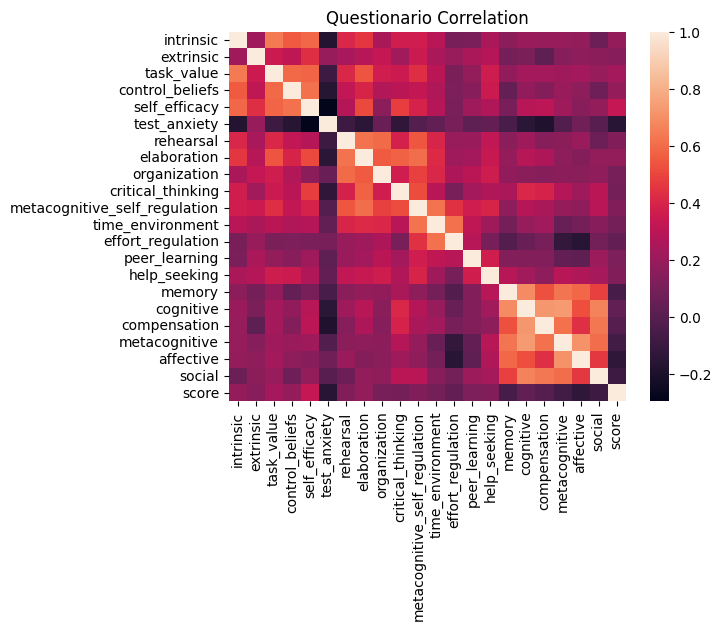

In [80]:
ax = plt.axes()
ax.set_title('Questionario Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/Questionario_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')

## viscode

In [100]:
viscode_pd = pd.read_csv('./data/viscode.csv')
viscode_pd = viscode_pd.drop(['Unnamed: 0', 'userid', 'score', 'class' ], axis=1)

In [120]:
viscode_pd.nunique()

code_copy                  317
code_execution             393
code_paste                 350
code_speed                 428
notebook_open              237
tree_open                  108
AssertionError               2
AttributeError              41
AxisError                    2
ConversionError              3
DataError                    2
EmptyDataError               7
Exception                    3
FileNotFoundError           13
HTTPError                    3
ImportError                  4
IndentationError            63
IndexError                  29
IndexingError                2
InvalidURL                   2
KeyError                    40
KeyboardInterrupt           24
ModuleNotFoundError         11
NameError                   74
OSError                      2
OverflowError                2
ParserError                 11
RecursionError               9
RuntimeError                 4
SelectorSyntaxError          2
SpecificationError           2
StopIteration                2
SyntaxEr

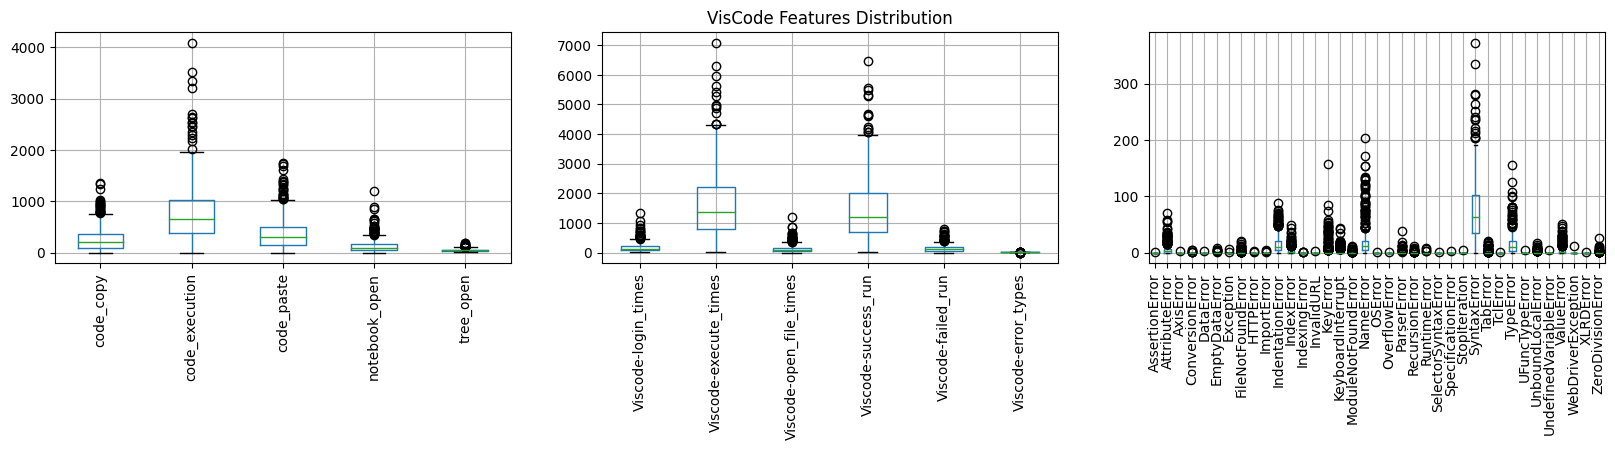

In [121]:
plt.figure(figsize=(20, 3))



plt.subplot(1, 3, 1)
viscode_pd[['code_copy', 'code_execution', 'code_paste', 'notebook_open', 'tree_open']].boxplot()

plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
viscode_pd[['Viscode-login_times', 'Viscode-execute_times', 'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run', 'Viscode-error_types', 'Viscode-spent_time']].boxplot()
plt.xticks(rotation=90)

plt.title('VisCode Features Distribution')

# plt.subplot(1, 3, 3)
# viscode_pd[['code_speed', 'codeLength' ]].boxplot()
# plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
viscode_pd.drop(['codeLength','code_copy', 'code_execution', 'code_paste', 'code_speed', 'notebook_open', 'tree_open', 'Viscode-login_times', 'Viscode-execute_times', 'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run', 'Viscode-error_types', 'Viscode-spent_time'], axis=1).boxplot() # 
plt.xticks(rotation=90)




results_path = './data_plot/VisCode_Features_Distribution.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

<Axes: >

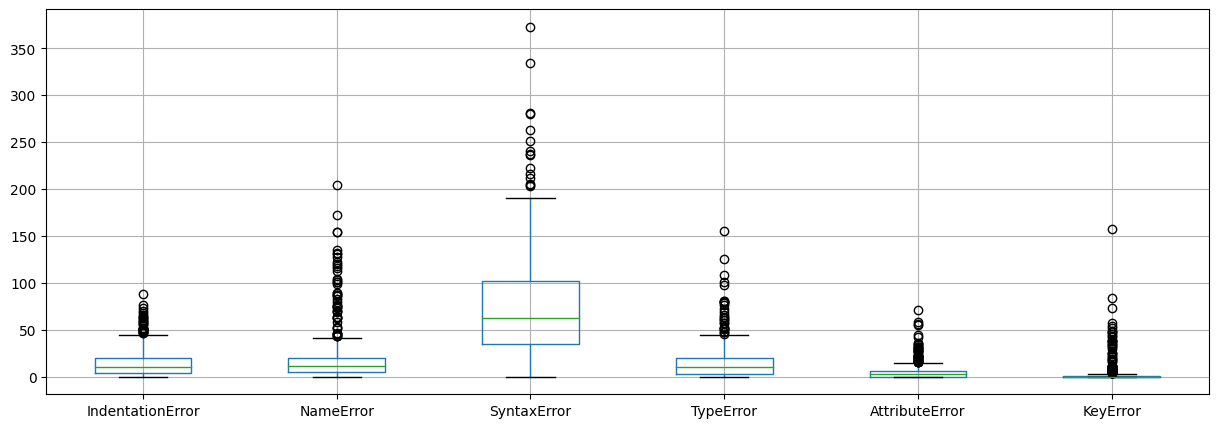

In [129]:
plt.figure(figsize=(15, 5))
viscode_pd[['IndentationError', 'NameError', 'SyntaxError', 'TypeError', 'AttributeError', 'KeyError']].boxplot()

In [54]:
viscode_pd = pd.read_csv('./data/viscode.csv')
viscode_pd = viscode_pd.drop(['Unnamed: 0', 'class', 'score'], axis =1)
viscode_pd

,userid,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AssertionError,AttributeError,AxisError,...,XLRDError,ZeroDivisionError,codeLength,Viscode-login_times,Viscode-execute_times,Viscode-open_file_times,Viscode-success_run,Viscode-failed_run,Viscode-error_types,Viscode-spent_time
0,019acd030e0cdf674dda03e2a8ca4369,507,887,670,4827,254,70,0,8,0,...,0,0,1368,324,2388,254,2256,132,7,0 days 01:24:59.160120
1,01ea38c4c3cc5fba869732fc641ca884,176,582,264,1521,73,35,0,7,0,...,0,0,3543,108,1130,73,1020,110,8,0 days 00:50:32.025803
2,023c88ec58c8cf0abcfbcea4166793ad,89,588,137,1563,79,44,0,8,0,...,0,0,3472,123,937,79,811,126,6,0 days 00:54:26.187369
3,02d679ad650962b6ae8bf8adbeeb33c1,69,545,150,1119,41,24,0,2,0,...,0,0,1228,65,829,41,701,128,7,0 days 01:06:30.302228
4,0307ea84b89fceab3b507fec1900ce7e,311,565,322,4836,140,54,0,0,0,...,0,0,6934,194,1392,140,1284,108,7,0 days 00:47:34.761720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,fda96a011b9b53ba6aa39fa978140bdc,264,858,257,2842,81,64,0,10,0,...,0,0,6108,145,1524,81,1358,166,6,0 days 01:28:19.441566
448,fe893f4359d6a6a550d109199d5f10f4,106,1044,129,2840,125,50,0,29,0,...,0,0,3714,175,1454,125,1090,364,11,0 days 01:39:59.864313
449,ff352cc412dda02baf83e6c095f81622,394,1270,520,4938,329,118,0,2,0,...,0,0,3934,447,2631,329,2399,232,9,0 days 02:07:27.617555
450,ff6a83db7cd1e89e7f401de25e5edcb7,10,9,20,54,4,2,0,0,0,...,0,0,194,6,45,4,43,2,1,0 days 00:00:25.883548


In [55]:
merge_pd = pd.merge(viscode_pd, score_pd, on='userid', how = 'outer')
merge_pd = merge_pd.drop( 'userid', axis =1)
merge_pd

,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AssertionError,AttributeError,AxisError,ConversionError,...,codeLength,Viscode-login_times,Viscode-execute_times,Viscode-open_file_times,Viscode-success_run,Viscode-failed_run,Viscode-error_types,Viscode-spent_time,score,class
0,507.0,887.0,670.0,4827.0,254.0,70.0,0.0,8.0,0.0,0.0,...,1368.0,324.0,2388.0,254.0,2256.0,132.0,7.0,0 days 01:24:59.160120,70,h
1,176.0,582.0,264.0,1521.0,73.0,35.0,0.0,7.0,0.0,0.0,...,3543.0,108.0,1130.0,73.0,1020.0,110.0,8.0,0 days 00:50:32.025803,80,a
2,89.0,588.0,137.0,1563.0,79.0,44.0,0.0,8.0,0.0,0.0,...,3472.0,123.0,937.0,79.0,811.0,126.0,6.0,0 days 00:54:26.187369,90,a
3,69.0,545.0,150.0,1119.0,41.0,24.0,0.0,2.0,0.0,0.0,...,1228.0,65.0,829.0,41.0,701.0,128.0,7.0,0 days 01:06:30.302228,56,c
4,311.0,565.0,322.0,4836.0,140.0,54.0,0.0,0.0,0.0,0.0,...,6934.0,194.0,1392.0,140.0,1284.0,108.0,7.0,0 days 00:47:34.761720,80,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,f
463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,i
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,i
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,i


In [56]:
corr = merge_pd.corr()

C:\Users\Mimo\AppData\Local\Temp\ipykernel_21144\1028273250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge_pd.corr()


<Axes: >

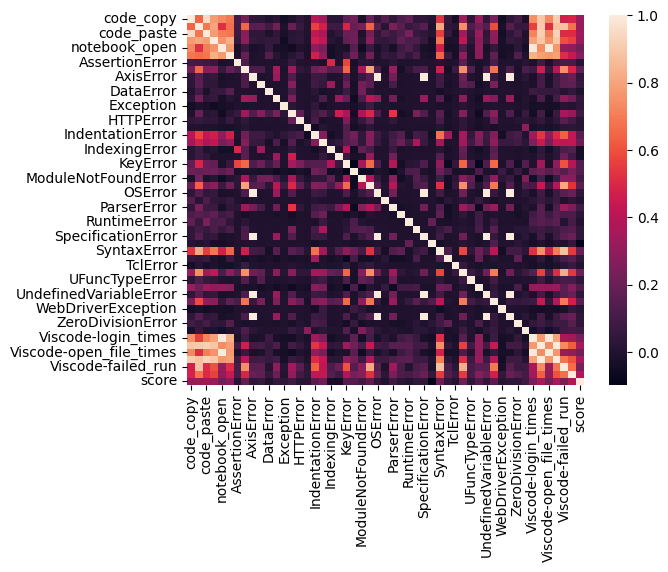

In [57]:
sns.heatmap(corr)

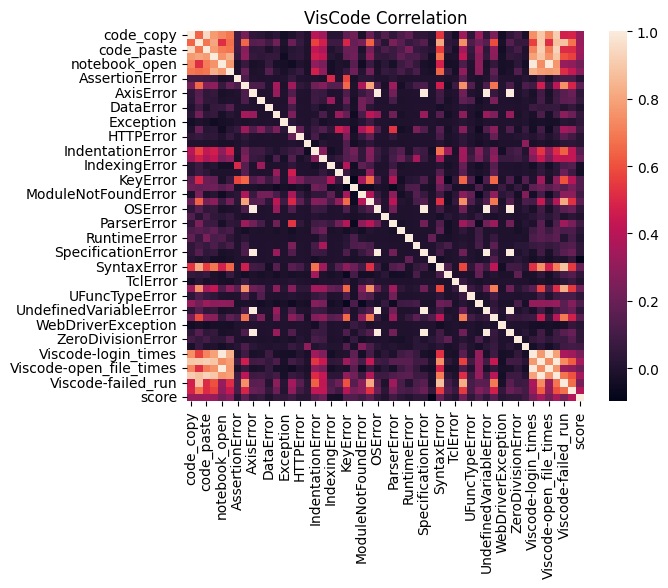

In [58]:
ax = plt.axes()
ax.set_title('VisCode Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/VisCode_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')

## bookroll

In [84]:
br_pd = pd.read_csv('./data/br.csv')

In [85]:
br_pd = br_pd.drop(['Unnamed: 0', 'userid', 'score', 'class' ], axis=1)

In [87]:
br_pd = br_pd.drop(['ADD_RECOMMENDATION', 'CLOSE_RECOMMENDATION', 'OPEN_RECOMMENDATION', 'LINK_CLICK', 'REGIST CONTENTS'], axis=1)
br_pd

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,DELETE BOOKMARK,DELETE MARKER,...,GETIT,MEMO_JUMP,NEXT,NOTGETIT,OPEN,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO
0,1,81,15,0,0,14,0,95,0,19,...,2,0,3321,2,159,109,1584,0,0,0
1,7,354,36,1,2,22,1,211,4,20,...,2,2,2209,1,256,67,750,1,0,2
2,1,61,25,0,0,9,0,290,1,18,...,2,0,3707,1,325,7,1275,0,0,0
3,4,188,28,8,4,25,0,38,2,50,...,0,15,1413,0,138,40,788,0,0,0
4,43,464,48,1,116,214,0,335,32,95,...,4,2,5582,1,415,80,2771,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,39,490,44,2,0,144,0,240,2,62,...,4,0,3834,1,343,20,1518,0,0,2
457,1,28,0,0,0,0,0,12,1,7,...,1,0,1723,2,87,112,692,0,0,0
458,0,186,19,16,0,19,6,78,0,4,...,0,0,2733,0,159,169,1034,0,0,1
459,1,0,0,0,0,0,0,9,0,0,...,0,0,125,0,9,0,0,0,0,0


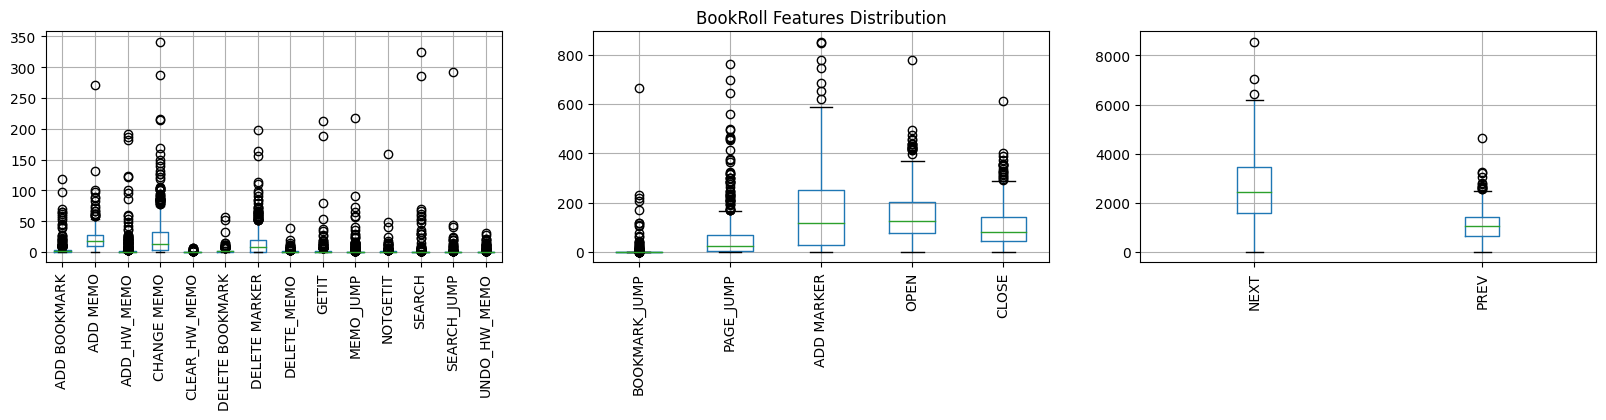

In [99]:
plt.figure(figsize=(20, 3))


plt.subplot(1, 3, 1)
br_pd.drop(['NEXT', 'PREV','ADD MARKER', 'OPEN', 'CLOSE', 'PAGE_JUMP', 'BOOKMARK_JUMP'], axis=1).boxplot() # 
plt.xticks(rotation=90)



plt.subplot(1, 3, 2)
br_pd[['BOOKMARK_JUMP', 'PAGE_JUMP', 'ADD MARKER', 'OPEN', 'CLOSE']].boxplot()
plt.xticks(rotation=90)

plt.title('BookRoll Features Distribution')


plt.subplot(1, 3, 3)
br_pd[['NEXT', 'PREV']].boxplot()
plt.xticks(rotation=90)


results_path = './data_plot/BookRoll_Features_Distribution.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

In [65]:
br_pd = pd.read_csv('./data/br.csv')
br_pd = br_pd.drop(['Unnamed: 0', 'class', 'score', 'ADD_RECOMMENDATION', 'REGIST CONTENTS'], axis =1)
br_pd

,userid,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,...,MEMO_JUMP,NEXT,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO
0,019acd030e0cdf674dda03e2a8ca4369,1,81,15,0,0,14,0,95,0,...,0,3321,2,159,0,109,1584,0,0,0
1,01ea38c4c3cc5fba869732fc641ca884,7,354,36,1,2,22,1,211,1,...,2,2209,1,256,0,67,750,1,0,2
2,023c88ec58c8cf0abcfbcea4166793ad,1,61,25,0,0,9,0,290,0,...,0,3707,1,325,0,7,1275,0,0,0
3,02d679ad650962b6ae8bf8adbeeb33c1,4,188,28,8,4,25,0,38,0,...,15,1413,0,138,0,40,788,0,0,0
4,0307ea84b89fceab3b507fec1900ce7e,43,464,48,1,116,214,0,335,0,...,2,5582,1,415,0,80,2771,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,fda96a011b9b53ba6aa39fa978140bdc,39,490,44,2,0,144,0,240,1,...,0,3834,1,343,0,20,1518,0,0,2
457,fe893f4359d6a6a550d109199d5f10f4,1,28,0,0,0,0,0,12,2,...,0,1723,2,87,0,112,692,0,0,0
458,ff352cc412dda02baf83e6c095f81622,0,186,19,16,0,19,6,78,0,...,0,2733,0,159,0,169,1034,0,0,1
459,ff6a83db7cd1e89e7f401de25e5edcb7,1,0,0,0,0,0,0,9,0,...,0,125,0,9,0,0,0,0,0,0


In [66]:
merge_pd = pd.merge(br_pd, score_pd, on='userid', how = 'outer')
merge_pd = merge_pd.drop( 'userid', axis =1)
merge_pd

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO,score,class
0,1.0,81.0,15.0,0.0,0.0,14.0,0.0,95.0,0.0,0.0,...,2.0,159.0,0.0,109.0,1584.0,0.0,0.0,0.0,70,h
1,7.0,354.0,36.0,1.0,2.0,22.0,1.0,211.0,1.0,4.0,...,1.0,256.0,0.0,67.0,750.0,1.0,0.0,2.0,80,a
2,1.0,61.0,25.0,0.0,0.0,9.0,0.0,290.0,0.0,1.0,...,1.0,325.0,0.0,7.0,1275.0,0.0,0.0,0.0,90,a
3,4.0,188.0,28.0,8.0,4.0,25.0,0.0,38.0,0.0,2.0,...,0.0,138.0,0.0,40.0,788.0,0.0,0.0,0.0,56,c
4,43.0,464.0,48.0,1.0,116.0,214.0,0.0,335.0,0.0,32.0,...,1.0,415.0,0.0,80.0,2771.0,0.0,0.0,1.0,80,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,i
463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,i
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,i
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,i


C:\Users\Mimo\AppData\Local\Temp\ipykernel_21144\1665474610.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge_pd.corr()


<Axes: >

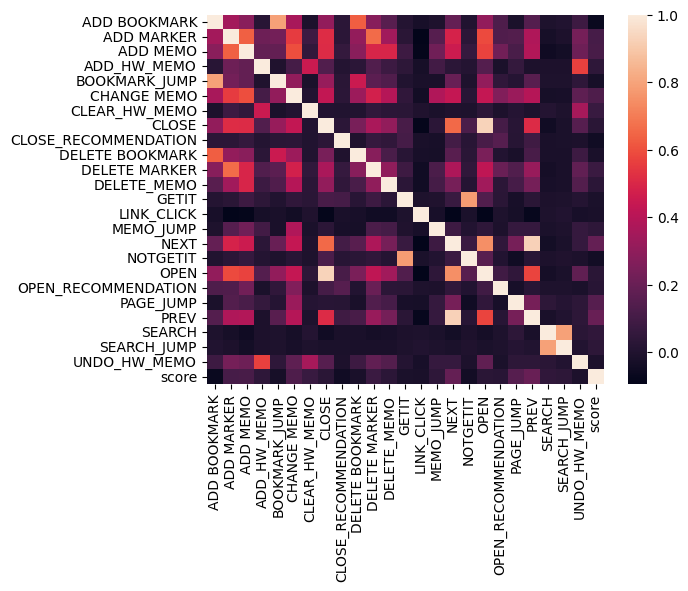

In [67]:
corr = merge_pd.corr()
sns.heatmap(corr)

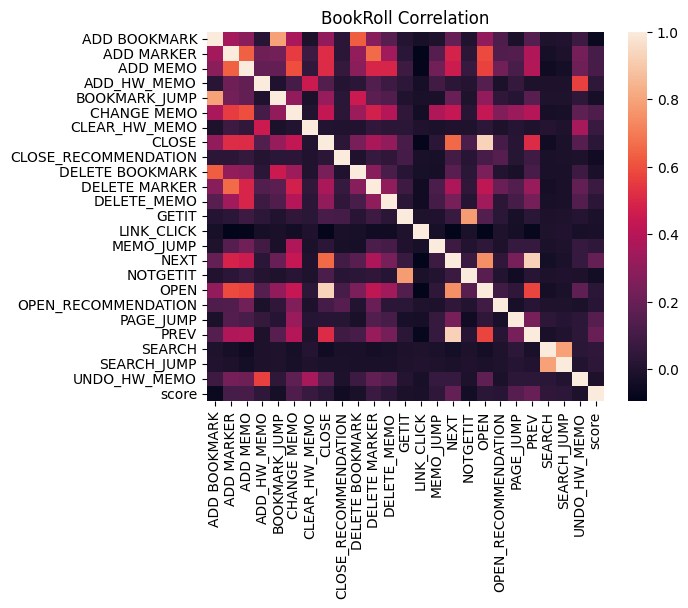

In [68]:
ax = plt.axes()
ax.set_title('BookRoll Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/BookRoll_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')